<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-March/blob/main/ANN/ANN_March.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Tensorflow Basics***

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.2


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
k=tf.constant(42)

In [6]:
k

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [7]:
a=tf.constant([[4,2],[9,5]])

In [8]:
a

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[4, 2],
       [9, 5]], dtype=int32)>

In [9]:
print(tf.ones(shape=(2,3)))

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [10]:
print(tf.zeros(shape=(2,3)))

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


In [11]:
a1 = tf.constant([[3,4,5], [3,4,5]])
a2= tf.constant([[1,2,3], [1,2,3]])

c=tf.add(a1,a2)

In [12]:
c

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[4, 6, 8],
       [4, 6, 8]], dtype=int32)>

In [16]:
tf.random.normal(shape=(2,2),mean=0,stddev=1.0)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.7480518 ,  1.3964913 ],
       [ 0.30054957,  0.29612586]], dtype=float32)>

In [15]:
tf.random.uniform(shape=(2,2),minval=0,maxval=10,dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[6, 4],
       [1, 3]], dtype=int32)>

In [17]:
a=tf.Variable(23)

In [18]:
a

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=23>

In [19]:
tensor = tf.Variable([ [ [10., 11., 12.], [13., 14., 15.] ], [ [16., 17., 18.], [19., 20., 21.] ] ]) # tensor variable
print(tensor.shape)

(2, 2, 3)


In [20]:
tensor1 = tf.reshape(tensor,[2,6])

In [21]:
tensor1

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[10., 11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20., 21.]], dtype=float32)>

In [22]:
tensor

<tf.Variable 'Variable:0' shape=(2, 2, 3) dtype=float32, numpy=
array([[[10., 11., 12.],
        [13., 14., 15.]],

       [[16., 17., 18.],
        [19., 20., 21.]]], dtype=float32)>

In [23]:
tensor1.numpy()

array([[10., 11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20., 21.]], dtype=float32)

# ANN (Artificial Neural Network)

*Churn Modelling* ==> Project

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/ANN/Churn_Modelling.csv')

In [26]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
X = dataset.iloc[:, 3:13]

In [28]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [29]:
y=dataset.iloc[:,13]

In [30]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [34]:
X=pd.get_dummies(X,drop_first=True)

#### DUMMY TRAP ######
Gender ==> Male Female
1. A        1     0
1. B        0     1

########################

Gender ==> Male

1. C.       1

2. D        0



############### 

Location    India     Dubai     Maldives

1. a          1         0         0
2. b          0         0         1


##############
Location      India       Dubai

1. C            0         0


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
#ANN MODEL

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [38]:
from tensorflow.keras import initializers

In [45]:
model = Sequential()
model.add(Dense(units=11, activation='relu'))
model.add(Dense(units=100, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))
#Output Layer
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

              Kaggle ==> Train (Y) , Test(No Y)
                          1. Train
                          2. Validation (2nd Test with Y)

In [46]:
model_history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=0.20)

Epoch 1/50
168/168 [==============================] - 1s 4ms/step - loss: 0.4796 - accuracy: 0.7940 - val_loss: 0.4202 - val_accuracy: 0.8313
Epoch 2/50
168/168 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.8265 - val_loss: 0.3970 - val_accuracy: 0.8410
Epoch 3/50
168/168 [==============================] - 1s 3ms/step - loss: 0.3993 - accuracy: 0.8364 - val_loss: 0.3785 - val_accuracy: 0.8493
Epoch 4/50
168/168 [==============================] - 1s 4ms/step - loss: 0.3781 - accuracy: 0.8446 - val_loss: 0.3604 - val_accuracy: 0.8515
Epoch 5/50
168/168 [==============================] - 1s 3ms/step - loss: 0.3658 - accuracy: 0.8474 - val_loss: 0.3520 - val_accuracy: 0.8545
Epoch 6/50
168/168 [==============================] - 1s 4ms/step - loss: 0.3548 - accuracy: 0.8532 - val_loss: 0.3489 - val_accuracy: 0.8552
Epoch 7/50
168/168 [==============================] - 1s 4ms/step - loss: 0.3506 - accuracy: 0.8563 - val_loss: 0.3476 - val_accuracy: 0.8567
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


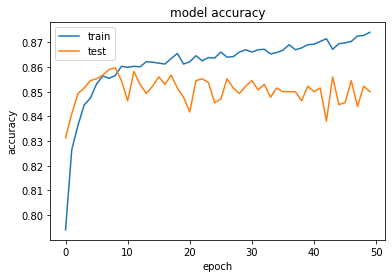

In [47]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

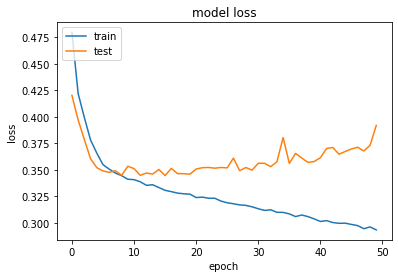

In [48]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
y_pred = model.predict(X_test)

In [51]:
y_pred = (y_pred > 0.5)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [53]:
score

0.8648484848484849

In [54]:
cm

array([[2576,   81],
       [ 365,  278]])

In [56]:
########
model.save('myModel.h5')

In [58]:
a=keras.models.load_model('myModel.h5')